In [31]:
from datetime import date
from enum import Enum
from operator import attrgetter, itemgetter
from pandas_datareader import data
import math
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', weight='bold')

In [32]:
class Party(Enum):
    democrat = 0
    republican = 1

    
def annualized_return(total_return, years):
    """ % annualized return """
    ret = math.pow(total_return / 100 + 1, 1 / years)
    return (ret - 1) * 100


def total_return(start, end):
    """ % total return """
    return (end / start - 1) * 100


class President():
    def __init__(self, name, party, end_date, start_date=None):
        self.name = name
        self.party = party
        self.end_date = end_date
        self.start_date = start_date
        self.start_price = None
        self.end_price = None
        
    def get_term(self):
        return ((self.end_date - self.start_date).days) / 365.25
        
    def get_total_return(self):
        """% total return"""
        return total_return(self.start_price, self.end_price)
    
    def get_annualized_return(self):
        """% annualized return"""
        return annualized_return(self.get_total_return(), self.get_term())

In [33]:
presidents = [President("Harry S. Truman", Party.democrat, date(1953, 1, 20), date(1945, 6, 12)),
              President("Dwight D. Eisenhower", Party.republican, date(1961, 1, 20)),
              President("John F. Kennedy", Party.democrat, date(1963, 11, 22)),
              President("Lyndon B. Johnson", Party.democrat, date(1969, 1, 29)),
              President("Richard Nixon", Party.republican, date(1974, 8, 9)),
              President("Gerald Ford", Party.republican, date(1977, 1, 20)),
              President("Jimmy Carter", Party.democrat, date(1981, 1, 20)),
              President("Ronald Reagan",  Party.republican, date(1989, 1, 20)),
              President("George H. W. Bush", Party.republican, date(1993, 1, 20)),
              President("Bill Clinton", Party.democrat, date(2001, 1, 20)),
              President("George W. Bush", Party.republican, date(2009, 1, 20)),
              President("Barack Obama", Party.democrat, date(2017, 1, 20))]

In [34]:
# set the start date equal to the previous presidents end date
for i, president in enumerate(presidents):
    if president.start_date is None:
        president.start_date = presidents[i-1].end_date

In [35]:
# get all the stock prices from yahoo
# using S&P 500 total return
for pres in presidents:
    price = data.DataReader("^GSPC", "yahoo", pres.start_date, pres.end_date)
    pres.start_price = price.ix[0]["Adj Close"]
    pres.end_price = price.ix[-1]["Adj Close"]

In [36]:
for pres in sorted(presidents, key=lambda x: x.get_total_return()):
    print("{} ({}): {:.2f}%".format(pres.name, "R" if pres.party == Party.republican else "D", pres.get_total_return()))

George W. Bush (R): -40.04%
Richard Nixon (R): -21.12%
John F. Kennedy (D): 16.09%
Gerald Ford (R): 27.34%
Jimmy Carter (D): 27.85%
Lyndon B. Johnson (D): 47.26%
George H. W. Bush (R): 51.19%
Harry S. Truman (D): 56.90%
Ronald Reagan (R): 117.72%
Dwight D. Eisenhower (R): 129.38%
Barack Obama (D): 182.07%
Bill Clinton (D): 209.79%


In [37]:
for pres in sorted(presidents, key=lambda x: x.get_annualized_return()):
    print("{} ({}): {:.2f}%".format(pres.name, "R" if pres.party == Party.republican else "D", pres.get_annualized_return()))

George W. Bush (R): -6.19%
Richard Nixon (R): -4.20%
John F. Kennedy (D): 5.40%
Harry S. Truman (D): 6.10%
Jimmy Carter (D): 6.34%
Lyndon B. Johnson (D): 7.75%
Ronald Reagan (R): 10.21%
Gerald Ford (R): 10.37%
George H. W. Bush (R): 10.89%
Dwight D. Eisenhower (R): 10.94%
Barack Obama (D): 13.84%
Bill Clinton (D): 15.18%


In [38]:
def total_return_by_party(presidents, party):
    term = 0
    total_return = 1.0
    for pres in presidents:
        if pres.party == party:
            total_return *= pres.end_price / pres.start_price
            term += pres.get_term()
            
    total_return = (total_return - 1) * 100
    return total_return, term

rep_return, rep_term = total_return_by_party(presidents, Party.republican)
dem_return, dem_term = total_return_by_party(presidents, Party.democrat)

print("Republican: Total return {}%, annualized {}%".format(rep_return,
                                                            annualized_return(rep_return, rep_term)))
print("Democrat: Total return {}%, annualized {}%".format(dem_return,
                                                          annualized_return(dem_return, dem_term)))


Republican: Total return 354.78839775299286%, annualized 4.300165628546138%
Democrat: Total return 2896.923212521224%, annualized 10.012260526775151%


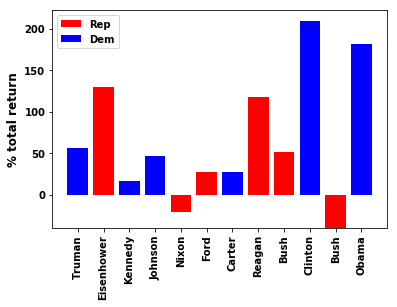

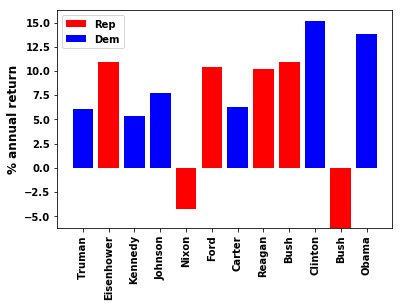

In [42]:
r_total = []
r_annual = []
r_ind = []
d_total = []
d_annual = []
d_ind = []
names = []
for i, pres in enumerate(presidents):
    names.append(pres.name.split(" ")[-1])
    if pres.party == Party.republican:
        r_total.append(pres.get_total_return())
        r_annual.append(pres.get_annualized_return())
        r_ind.append(i)
    else:
        d_total.append(pres.get_total_return())
        d_annual.append(pres.get_annualized_return())
        d_ind.append(i)

fig = plt.figure(0)
rects1 = plt.bar(r_ind, r_total, 0.8, color='r', label='Rep')
rects2 = plt.bar(d_ind, d_total, 0.8, color='b', label='Dem')
plt.xticks(range(0, len(presidents)), names, rotation='vertical')
plt.ylabel("% total return", fontsize=12, fontweight='bold')
plt.legend()
plt.show()

fig = plt.figure(1)
rects1 = plt.bar(r_ind, r_annual, 0.8, color='r', label='Rep')
rects2 = plt.bar(d_ind, d_annual, 0.8, color='b', label='Dem')
plt.xticks(range(0, len(presidents)), names, rotation='vertical')
plt.ylabel("% annual return", fontsize=12, fontweight='bold')
plt.legend()
plt.show()

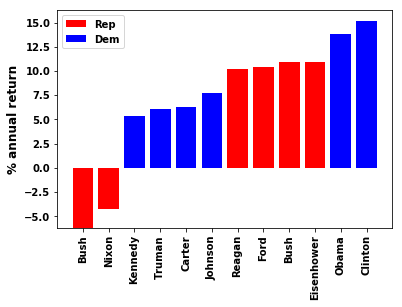

In [44]:
r_annual = []
r_ind = []
d_annual = []
d_ind = []
names = []
for i, pres in enumerate(sorted(presidents, key=lambda x: x.get_annualized_return())):
    names.append(pres.name.split(" ")[-1])
    if pres.party == Party.republican:
        r_annual.append(pres.get_annualized_return())
        r_ind.append(i)
    else:
        d_annual.append(pres.get_annualized_return())
        d_ind.append(i)

fig = plt.figure(0)
rects1 = plt.bar(r_ind, r_annual, 0.8, color='r', label='Rep')
rects2 = plt.bar(d_ind, d_annual, 0.8, color='b', label='Dem')
plt.ylabel("% annual return", fontsize=12, fontweight='bold')
plt.xticks(range(0, len(presidents)), names, rotation='vertical')
plt.legend()
plt.show()

In [45]:
# Returns not counting clinton, bush, obama
rep_return, rep_term = total_return_by_party(presidents[:-3], Party.republican)
dem_return, dem_term = total_return_by_party(presidents[:-3], Party.democrat)

print("Republican: Total return {}%, annualized {}%".format(rep_return,
                                                            annualized_return(rep_return, rep_term)))
print("Democrat: Total return {}%, annualized {}%".format(dem_return,
                                                          annualized_return(dem_return, dem_term)))

Republican: Total return 658.4701972790683%, annualized 7.511285833020653%
Democrat: Total return 242.9614615737604%, annualized 6.478605762078549%
